In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
np.set_printoptions(precision=3)

In [ ]:
a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]
t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)
print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [ ]:
t_ones = tf.ones((2, 3))
t_ones.shape

TensorShape([2, 3])

In [ ]:
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [ ]:
const_tensor = tf.constant([1.2, 5, np.pi], dtype=tf.float32)
print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


In [ ]:
t_a_new = tf.cast(t_a, tf.int64)
print(t_a_new.dtype)

<dtype: 'int64'>


In [ ]:
t = tf.random.uniform(shape=(3, 5))
t_tr = tf.transpose(t)
print(t.shape, '--->', t_tr.shape)

(3, 5) ---> (5, 3)


In [ ]:
t = tf.zeros((30,))
t_reshape = tf.reshape(t, shape=(5, 6))
print(t_reshape.shape)

(5, 6)


In [ ]:
t = tf.zeros((1, 2, 1, 4, 1))
t_sqz = tf.squeeze(t, axis=(2, 4))
print(t.shape, '--->', t_sqz.shape)

(1, 2, 1, 4, 1) ---> (1, 2, 4)


In [ ]:
tf.random.set_seed(1)
t1 = tf.random.uniform(shape=(5, 2),
                       minval=-1.0, maxval=1.0)
t2 = tf.random.normal(shape=(5, 2),
                      mean=0.0, stddev=1.0)

In [ ]:
t3 = tf.multiply(t1, t2).numpy()
print(t3)

[[-0.27  -0.874]
 [-0.017 -0.175]
 [-0.296 -0.139]
 [-0.727  0.135]
 [-0.401  0.004]]


In [ ]:
t4 = tf.math.reduce_mean(t1, axis=0)
print(t4)

tf.Tensor([0.09  0.207], shape=(2,), dtype=float32)


In [ ]:
t5 = tf.linalg.matmul(t1, t2, transpose_b=True)
print(t5.numpy())

[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]]


In [ ]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True)
print(t6.numpy())

[[-1.711  0.302]
 [ 0.371 -1.049]]


In [ ]:
norm_t1 = tf.norm(t1, ord=2, axis=1).numpy()
print(norm_t1)

[1.046 0.293 0.504 0.96  0.383]


In [ ]:
tf.random.set_seed(1)
t = tf.random.uniform((6,))
print(t.numpy())

[0.165 0.901 0.631 0.435 0.292 0.643]


In [ ]:
t_splits = tf.split(t, num_or_size_splits=3)
[item.numpy() for item in t_splits]

[array([0.165, 0.901], dtype=float32),
 array([0.631, 0.435], dtype=float32),
 array([0.292, 0.643], dtype=float32)]

In [ ]:
t = tf.random.uniform((5,))
print(t.numpy())

[0.51  0.444 0.409 0.992 0.689]


In [ ]:
t_splits = tf.split(t, num_or_size_splits=[3,2])
[items.numpy() for items in t_splits]

[array([0.51 , 0.444, 0.409], dtype=float32),
 array([0.992, 0.689], dtype=float32)]

In [ ]:
A = tf.ones((3,))
B = tf.zeros((2,))
C = tf.concat([A, B], axis=0)
print(C.numpy())

[1. 1. 1. 0. 0.]


In [ ]:
A = tf.ones((3,))
B = tf.zeros((3,))
S = tf.stack([A, B], axis=1)
print(S.numpy())

[[1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
S.shape

TensorShape([3, 2])

In [ ]:
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]
ds = tf.data.Dataset.from_tensor_slices(a)
print(ds)

<TensorSliceDataset shapes: (), types: tf.float32>


In [ ]:
for items in ds:
    print(items)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
ds_batch = ds.batch(3)
for i, elem in enumerate(ds_batch, 1):
    print("batch {}:".format(i), elem.numpy())

batch 1: [1.2 3.4 7.5]
batch 2: [4.1 5.  1. ]


In [ ]:
tf.random.set_seed(1)
t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)
ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)

ds_joint = tf.data.Dataset.zip((ds_x, ds_y))
for example in ds_joint:
    print('  x:', example[0].numpy(), '  y:', example[1].numpy())

  x: [0.165 0.901 0.631]   y: 0
  x: [0.435 0.292 0.643]   y: 1
  x: [0.976 0.435 0.66 ]   y: 2
  x: [0.605 0.637 0.614]   y: 3


In [ ]:
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))
for example in ds_joint:
    print(' x:', example[0].numpy(), ' y:', example[1].numpy())


 x: [0.165 0.901 0.631]  y: 0
 x: [0.435 0.292 0.643]  y: 1
 x: [0.976 0.435 0.66 ]  y: 2
 x: [0.605 0.637 0.614]  y: 3


In [ ]:
ds_trans = ds_joint.map(lambda x, y: (x*2-1.0, y))
for example in ds_trans:
    print('  x:', example[0].numpy(), 
          '  y:', example[1].numpy())

  x: [-0.67   0.803  0.262]   y: 0
  x: [-0.131 -0.416  0.285]   y: 1
  x: [ 0.952 -0.13   0.32 ]   y: 2
  x: [0.21  0.273 0.229]   y: 3


In [ ]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=len(ds_joint))
for example in ds:
    print(' x:', example[0].numpy(), ' y:', example[1].numpy())

 x: [0.976 0.435 0.66 ]  y: 2
 x: [0.435 0.292 0.643]  y: 1
 x: [0.165 0.901 0.631]  y: 0
 x: [0.605 0.637 0.614]  y: 3


In [ ]:
ds = ds_joint.batch(batch_size=3, drop_remainder=False)
batch_x, batch_y = next(iter(ds))
print('Batch-x:\n', batch_x.numpy())

Batch-x:
 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]]


In [ ]:
print("Batch-y:\n", batch_y.numpy())

Batch-y:
 [0 1 2]


In [ ]:
ds = ds_joint.batch(3).repeat(count=2)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


In [ ]:
ds = ds_joint.repeat(count=2).batch(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y)

0 (3, 3) tf.Tensor([0 1 2], shape=(3,), dtype=int32)
1 (3, 3) tf.Tensor([3 0 1], shape=(3,), dtype=int32)
2 (2, 3) tf.Tensor([2 3], shape=(2,), dtype=int32)


In [ ]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(4).batch(2).repeat(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


In [ ]:
tf.random.set_seed(1)
ds = ds_joint.batch(2).repeat(2).shuffle(4)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i,batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]


In [ ]:
import pathlib
imgdir_path = pathlib.Path('/content/drive/My Drive/DATA/cat_dog_images')

In [ ]:
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['/content/drive/My Drive/DATA/cat_dog_images/cat-01.jpg', '/content/drive/My Drive/DATA/cat_dog_images/cat-02.jpg', '/content/drive/My Drive/DATA/cat_dog_images/cat-03.jpg', '/content/drive/My Drive/DATA/cat_dog_images/dog-01.jpg', '/content/drive/My Drive/DATA/cat_dog_images/dog-02.jpg', '/content/drive/My Drive/DATA/cat_dog_images/dog-03.jpg']


Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


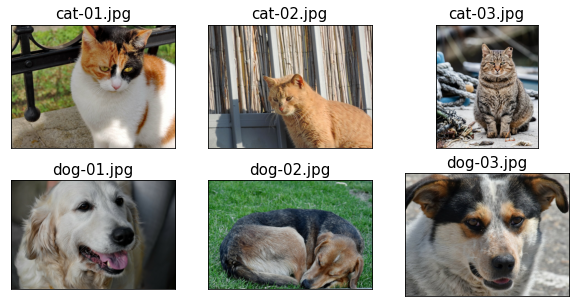

In [ ]:
import matplotlib.pyplot as plt
import os

fig = plt.figure(figsize=(10,5))
for i, file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('Image shape: ', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

plt.tight_layout
plt.show()

In [ ]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [ ]:
ds_files_labels = tf.data.Dataset.from_tensor_slices((file_list, labels))
for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

b'/content/drive/My Drive/DATA/cat_dog_images/cat-01.jpg' 0
b'/content/drive/My Drive/DATA/cat_dog_images/cat-02.jpg' 0
b'/content/drive/My Drive/DATA/cat_dog_images/cat-03.jpg' 0
b'/content/drive/My Drive/DATA/cat_dog_images/dog-01.jpg' 1
b'/content/drive/My Drive/DATA/cat_dog_images/dog-02.jpg' 1
b'/content/drive/My Drive/DATA/cat_dog_images/dog-03.jpg' 1


In [ ]:
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0
    return image, label

In [ ]:
img_width, img_height = 120, 80 
ds_images_labels = ds_files_labels.map(load_and_preprocess)

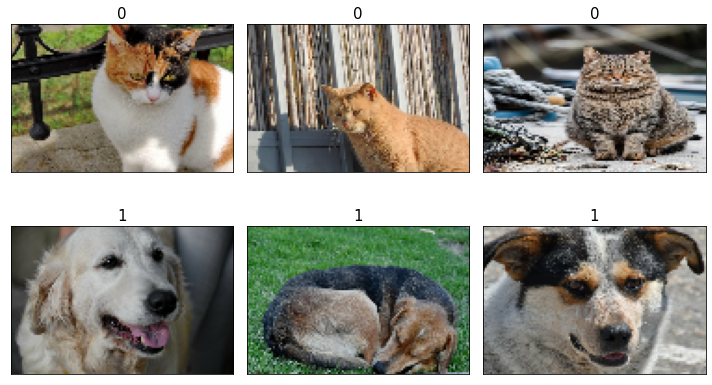

In [ ]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(ds_images_labels):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()), size=15)
plt.tight_layout()
plt.show()